In [1]:
import numpy as np
import matplotlib . pyplot as plt
from look_up import *
nch = importdata ( 'nch_1v.mat')
pch = importdata ( 'pch_1v.mat')


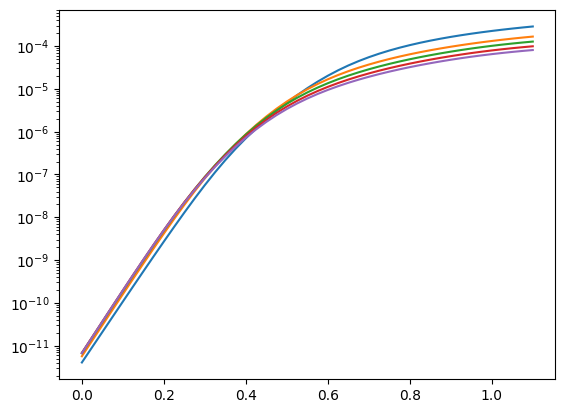

In [2]:
L = np.arange (0.1 , 1 , 0.2)
plt.semilogy (nch [ 'VGS'] , look_up_basic (nch , 'ID', vgs = nch ['VGS'],l = L).T)
plt.show ()

The length of the device in the ID, VDS curves is 0.05 um.


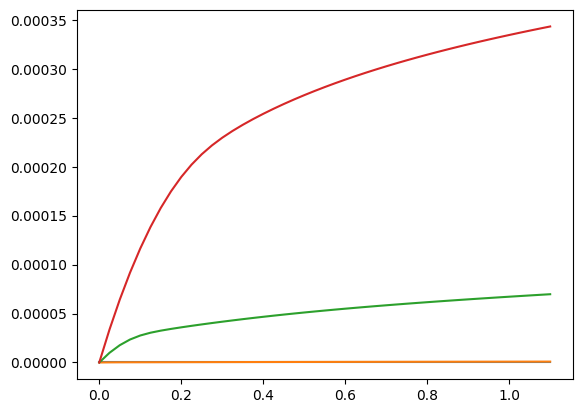

In [3]:
VGS = np.arange (0.1 , max (nch ['VGS']) , 0.3)
plt.plot ( nch ['VDS'] , look_up_basic (nch ,'ID', vgs = VGS , vds = nch ['VDS']) . T )
device_length = nch['L'][0]
print(f"The length of the device in the ID, VDS curves is {device_length:.2f} um.")

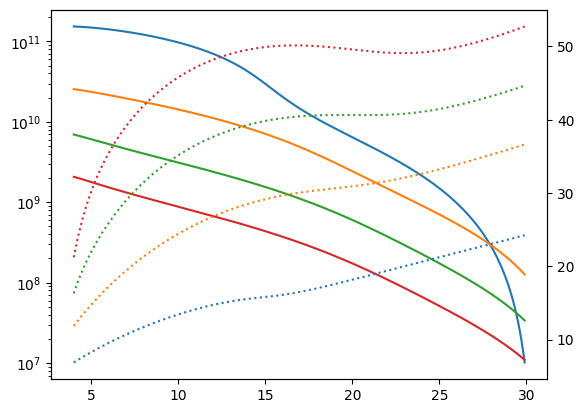

In [4]:
L = np.array ([0.05 , 0.2 , 0.5 , 1])
gm_ID = np.arange (4 , 30 , 0.1)
ft = look_up_vs_gm_id ( nch , 'GM_CGG', gm_ID , l = L ) /2/ np . pi
Av = look_up_vs_gm_id ( nch , 'GM_GDS', gm_ID , l = L )
fig , ax1 = plt . subplots ()
ax2 = ax1 . twinx ()
ax1.semilogy ( gm_ID , ft .T , '-' )
ax2.plot ( gm_ID , Av .T , ':')
plt.show ()

In [4]:
# EX1
gm_ID = 15  # S/A
L = 0.1  # 100nm=0.1um
CL = 1e-12  # 1 pF 
fu = 1e9  # 1 GHz
VDS = 0.55  # V
VSB = 0  # V, 

fT = look_up_vs_gm_id(nch, 'GM_CGG', gm_ID, vds=VDS, l=L) / (2 * np.pi)
Av = look_up_vs_gm_id (nch , 'GM_GDS', gm_ID, vds=VDS, l=L)
gds = look_up_vs_gm_id(nch, 'GDS', gm_ID, vds=VDS, l=L)

print(f"gds:{gds}")

gm = 2 * np.pi * fu * CL
print(f"gm:{gm}")

ro = 1 / gds
intrinsic_gain = gm * ro

print(f"gain :{Av}dB")

ID = gm / gm_ID

JD = look_up_vs_gm_id(nch,'ID_W',gm_ID, vds=VDS, l=L)
# print(JD)
W = ID / JD
print(f"ID:{ID}")
VGS = look_up_vgs_vs_gm_id(nch, gm_ID, l=L, vds=VDS)

print(f"Intrinsic Gain: {intrinsic_gain}")
print(f"fT: {fT} Hz")
print(f"Width (W): {W} nm")
print(f"Required VGS: {VGS} V")


gds:6.126130923410093e-06
gm:0.006283185307179587
gain :22.3749557464052dB
ID:0.0004188790204786391
Intrinsic Gain: 1025.6367984512597
fT: 19140664934.0163 Hz
Width (W): 45.838353879318866 nm
Required VGS: 0.5413900140014473 V


## EX2

Maximum value of L that satisfies fu ≤ fT/10: 0.250


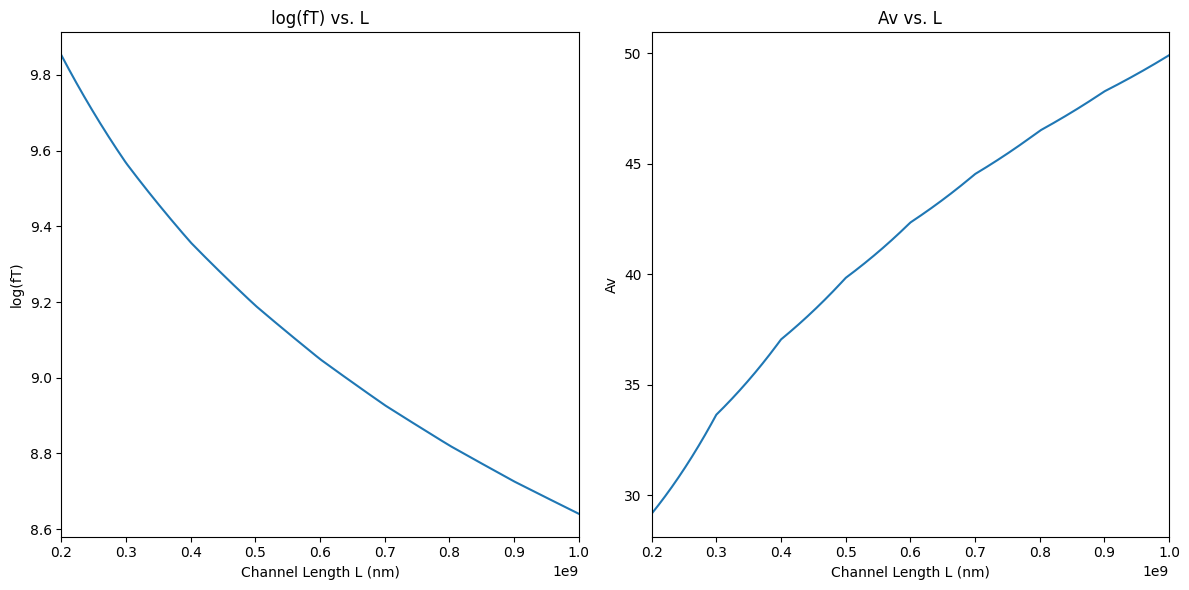

In [2]:
#EX2
gm_ID = 15  # S/A
CL = 1e-12  # 1 pF
fu = 5e8  # 500 MHz
VDS = 0.55  # V
VSB = 0  # V
L_values = np.linspace(0.2, 1.0, 1000)  # Adjusted to a valid number of points

# Containers for results
fT_values = []
Av_values = []
W_values = []

for L in L_values:
    # Correct function calls
    fT = look_up_vs_gm_id(nch, 'GM_CGG', gm_ID, vds=VDS, l=L) / (2 * np.pi)
    Av = look_up_vs_gm_id(nch, 'GM_GDS', gm_ID, vds=VDS, l=L)  # Corrected to L
    gds = look_up_vs_gm_id(nch, 'GDS', gm_ID, vds=VDS, l=L)
    gm = 2 * np.pi * fu * CL
    ID = gm / gm_ID
    JD = look_up_vs_gm_id(nch, 'ID_W', gm_ID, vds=VDS, l=L)
    W = ID / JD
    VGS = look_up_vgs_vs_gm_id(nch, gm_ID, l=L, vds=VDS)

    fT_values.append(fT)
    Av_values.append(Av)
    W_values.append(W)

# Find the maximum value of L that satisfies fu ≤ fT/10
fT_values = np.array(fT_values)
L_max_index = np.where(fT_values >= 10 * fu)[0][-1]
L_max = L_values[L_max_index]

print(f"Maximum value of L that satisfies fu ≤ fT/10: {L_max:.3f}")

# Plot log(fT) vs. L
plt.figure(figsize=(12, 6))
L_values_nm = L_values * 1e9
plt.subplot(1, 2, 1)
plt.plot(L_values_nm, np.log10(fT_values))
plt.xlabel('Channel Length L (nm)')
plt.ylabel('log(fT)')
plt.title('log(fT) vs. L')
plt.xlim(L_values_nm.min(), L_values_nm.max())

# Plot Av vs. L
plt.subplot(1, 2, 2)
plt.plot(L_values_nm, Av_values)
plt.xlabel('Channel Length L (nm)')
plt.ylabel('Av')
plt.title('Av vs. L')
plt.xlim(L_values_nm.min(), L_values_nm.max())

plt.tight_layout()
plt.show()

In [3]:
gm_ID = 5  # V^(-1)
CL = 1e-12  # 1 pF
fu = 5e8  # 500 MHz
VDS = 0.55  # V
VSB = 0  # V

# Solution 1
L_1 = 0.200  # Maximum value of L that satisfies fu ≤ fT/10

fT_1 = look_up_vs_gm_id(nch, 'GM_CGG', gm_ID, vds=VDS, l=L_1) / (2 * np.pi)
Av_1 = look_up_vs_gm_id(nch, 'GM_GDS', gm_ID, vds=VDS, l=L_1)
gds_1 = look_up_vs_gm_id(nch, 'GDS', gm_ID, vds=VDS, l=L_1)

print(f"Solution 1:")
print(f"gds: {gds_1}")

gm_1 = 2 * np.pi * fu * CL
print(f"gm: {gm_1}")

ro_1 = 1 / gds_1
intrinsic_gain_1 = gm_1 * ro_1
print(f"Av_1:{Av_1}")

ID_1 = gm_1 / gm_ID

JD_1 = look_up_vs_gm_id(nch, 'ID_W', gm_ID, vds=VDS, l=L_1)
W_1 = ID_1 / JD_1
print(f"ID: {ID_1}")
VGS_1 = look_up_vgs_vs_gm_id(nch, gm_ID, l=L_1, vds=VDS)

print(f"Intrinsic Gain: {intrinsic_gain_1}")
print(f"fT: {fT_1} Hz")
print(f"Width (W): {W_1}um")
print(f"Required VGS: {VGS_1} V")

# Solution 2
L_2 = 0.150  # Different L value

fT_2 = look_up_vs_gm_id(nch, 'GM_CGG', gm_ID, vds=VDS, l=L_2) / (2 * np.pi)
Av_2 = look_up_vs_gm_id(nch, 'GM_GDS', gm_ID, vds=VDS, l=L_2)
gds_2 = look_up_vs_gm_id(nch, 'GDS', gm_ID, vds=VDS, l=L_2)

print(f"\nSolution 2:")
print(f"gds: {gds_2}")

gm_2 = 2 * np.pi * fu * CL
print(f"gm: {gm_2}")

ro_2 = 1 / gds_2
intrinsic_gain_2 = gm_2 * ro_2
print(f"Av_2:{Av_2}")

ID_2 = gm_2 / gm_ID

JD_2 = look_up_vs_gm_id(nch, 'ID_W', gm_ID, vds=VDS, l=L_2)
W_2 = ID_2 / JD_2
print(f"ID: {ID_2}")
VGS_2 = look_up_vgs_vs_gm_id(nch, gm_ID, l=L_2, vds=VDS)

print(f"Intrinsic Gain: {intrinsic_gain_2}")
print(f"fT: {fT_2} Hz")
print(f"Width (W): {W_2} um")
print(f"Required VGS: {VGS_2} V")

Solution 1:
gds: 2.502492661361499e-05
gm: 0.0031415926535897933
Av_1:14.746308669032837
ID: 0.0006283185307179586
Intrinsic Gain: 125.5385361202453
fT: 23631787861.693783 Hz
Width (W): 8.513192541882058um
Required VGS: 0.788232664541688 V

Solution 2:
gds: 3.4185441856161765e-05
gm: 0.0031415926535897933
Av_2:12.926595865864167
ID: 0.0006283185307179586
Intrinsic Gain: 91.8985533903092
fT: 36138451637.40196 Hz
Width (W): 7.109261550746517 um
Required VGS: 0.7981899263115952 V


## EX3


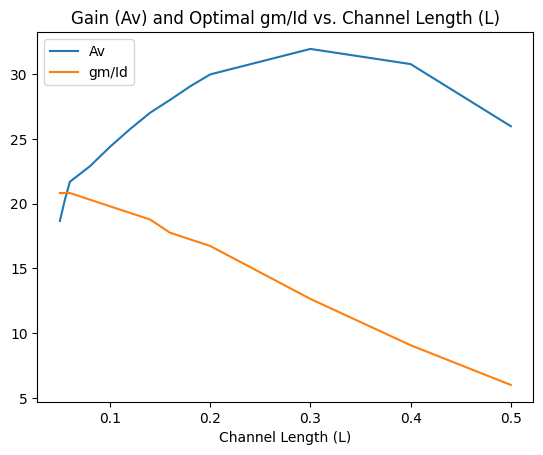

cdd:1.5026654822593045e-14
gm_opt:0.003188800281988481
gm_id_opt: 12.653061224489797
l_opt:0.3
ID: 0.0002520180868023154
Intrinsic Gain: 980.953998574116
fT: 5236052709.749647 Hz
Width (W): 30.72242169604027 m
Required VGS: 0.5355170758330997 V


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from look_up import *
nch = importdata ( 'nch_1v.mat')

L = nch['L']
fu = 5e8
CL = 1e-12
VDS = 0.55
gm_id_range = np.linspace(5, 30, 50)
gm_id = []
av = []

for i, l in enumerate(L):
    # TODO: Find ft
    ft = look_up_vs_gm_id(nch, 'GM_CGG', gm_id_range, vds=VDS, l=l) / (2 * np.pi)
    m = ft >= 10 * fu
    if np.any(m):
        gm_id.append(gm_id_range[max(np.where(m == 1)[0])])
    else:
        gm_id.append(float('nan'))

    # TODO: Obtain av[i] = gm / gds
    gm = look_up_vs_gm_id(nch, 'GM', gm_id[i], vds=VDS, l=l)
    gds = look_up_vs_gm_id(nch, 'GDS', gm_id[i], vds=VDS, l=l)
    av.append(gm / gds)

fig, ax = plt.subplots(1)
ax.plot(L, av, label='Av')

ax.plot(L, gm_id, label='gm/Id')
ax.legend()
plt.xlabel('Channel Length (L)')
plt.title('Gain (Av) and Optimal gm/Id vs. Channel Length (L)')
plt.show()

gm_id_opt = gm_id[np.nanargmax(av)]
l_opt = L[np.nanargmax(av)]  

# TODO: Lookup to find JD
jd = look_up_vs_gm_id(nch, 'ID_W', gm_id_opt, vds=VDS, l=l_opt)

cdd_w = look_up_vs_gm_id(nch, 'CDD_W', gm_id_opt, vds=VDS, l=l_opt)
cdd = 0
for i in range(1, 10):
    gm_opt = 2 * np.pi * fu * (CL + cdd)
    ID = gm_opt / gm_id_opt
    W = ID / jd
    cdd = W * cdd_w

print(f"cdd:{cdd}")
print(f"gm_opt:{gm_opt}")
print(f"gm_id_opt: {gm_id_opt}")
print(f"l_opt:{l_opt}")


# Simulation parameter
fT_3 = look_up_vs_gm_id(nch, 'GM_CGG', gm_id_opt, vds=VDS, l=l_opt) / (2 * np.pi)
Av_3 = look_up_vs_gm_id(nch, 'GM_GDS', gm_id_opt, vds=VDS, l=l_opt)
gds_3 = look_up_vs_gm_id(nch, 'GDS', gm_id_opt, vds=VDS, l=l_opt)

ro = 1 / gds_3
intrinsic_gain_3 = gm_opt * ro

ID_3 = gm_opt / gm_id_opt

JD_3 = look_up_vs_gm_id(nch, 'ID_W', gm_id_opt, vds=VDS, l=l_opt)
W_3 = ID_3 / JD_3
print(f"ID: {ID_3}")
VGS_3 = look_up_vgs_vs_gm_id(nch, gm_id_opt, l=l_opt, vds=VDS)

print(f"Intrinsic Gain: {intrinsic_gain_3}")
print(f"fT: {fT_3} Hz")
print(f"Width (W): {W_3} m")
print(f"Required VGS: {VGS_3} V")

## EX4

In [3]:
import numpy as np
import matplotlib . pyplot as plt
from look_up import *
nch = importdata ( 'nch_1v.mat')
pch = importdata ( 'pch_1v.mat')
L = nch['L']

In [3]:
def lab1(fu, CL=1e-12, gm_id_range=np.linspace(5, 30, 50), vds_range=np.linspace(0.35, 1.05, 200)):
    nch = importdata('nch_1v.mat')
    L = nch['L']

    av_matrix = np.zeros((len(L), len(vds_range)))
    gm_id_matrix = np.zeros((len(L), len(vds_range)))

    for i, l in enumerate(L):
        ft = look_up_vs_gm_id(nch, 'GM_CGG', gm_id_range, l=l) / (2 * np.pi)
        m = ft >= 10 * fu
        if np.any(m):
            gm_id_opt = gm_id_range[max(np.where(m == 1)[0])]
        else:
            gm_id_opt = float('nan')

        for j, vds in enumerate(vds_range):
            gds_id = look_up_vs_gm_id(nch, 'GDS_ID', gm_id_opt, vds=vds, l=l)
            av_matrix[i, j] = gm_id_opt / (gds_id + 1/(1.1-vds))
            gm_id_matrix[i, j] = gm_id_opt

    max_indices = np.unravel_index(np.nanargmax(av_matrix), av_matrix.shape)
    max_l_index, max_vds_index = max_indices
    gm_id_opt = gm_id_matrix[max_indices]
    l_opt = L[max_l_index]
    vds_opt = vds_range[max_vds_index]

    jd = look_up_vs_gm_id(nch, 'ID_W', gm_id_opt, vds=vds_opt, l=l_opt)

    cdd_w = look_up_vs_gm_id(nch, 'CDD_W', gm_id_opt, vds=vds_opt, l=l_opt)
    cdd = 0
    for i in range(1, 10):
        gm_opt = 2 * np.pi * fu * (CL + cdd)
        ID = gm_opt / gm_id_opt
        W = ID / jd
        cdd = W * cdd_w

    result = {
        'fu': fu,
        'cdd': cdd,
        'gm_opt': gm_opt,
        'gm_id_opt': gm_id_opt,
        'l_opt': l_opt,
        'vds_opt': vds_opt,
        'ID': ID,
        'VGS': look_up_vgs_vs_gm_id(nch, gm_id_opt, l=l_opt, vds=vds_opt),
        'RD': (1.1 - vds_opt) / ID,
        'W': W
    }
    
    return result

In [4]:
def lab1(fu, CL=1e-12, gm_id_range=np.linspace(5, 30, 50), vds_range=np.linspace(0.35, 1.05, 200)):
    nch = importdata('nch_1v.mat')
    L = nch['L']

    av_matrix = np.zeros((len(gm_id_range), len(L)))
    vds_opt_matrix = np.zeros((len(gm_id_range), len(L)))

    for i, gm_id in enumerate(gm_id_range):
        for j, l in enumerate(L):
            ft = look_up_vs_gm_id(nch, 'GM_CGG', gm_id, l=l) / (2 * np.pi)
            if ft < 10 * fu:
                av_matrix[i, j] = float('nan')
                vds_opt_matrix[i, j] = float('nan')
                continue

            av_values = []
            for vds in vds_range:
                gds_id = look_up_vs_gm_id(nch, 'GDS_ID', gm_id, vds=vds, l=l)
                av = gm_id / (gds_id + 1/(1.1-vds))
                av_values.append(av)

            max_av_index = np.argmax(av_values)
            av_matrix[i, j] = av_values[max_av_index]
            vds_opt_matrix[i, j] = vds_range[max_av_index]

    max_indices = np.unravel_index(np.nanargmax(av_matrix), av_matrix.shape)
    max_gm_id_index, max_l_index = max_indices
    gm_id_opt = gm_id_range[max_gm_id_index]
    l_opt = L[max_l_index]
    vds_opt = vds_opt_matrix[max_indices]

    jd = look_up_vs_gm_id(nch, 'ID_W', gm_id_opt, vds=vds_opt, l=l_opt)

    cdd_w = look_up_vs_gm_id(nch, 'CDD_W', gm_id_opt, vds=vds_opt, l=l_opt)
    cdd = 0
    for i in range(1, 10):
        gm_opt = 2 * np.pi * fu * (CL + cdd)
        ID = gm_opt / gm_id_opt
        W = ID / jd
        cdd = W * cdd_w

    result = {
        'fu': fu,
        'cdd': cdd,
        'gm_opt': gm_opt,
        'gm_id_opt': gm_id_opt,
        'l_opt': l_opt,
        'vds_opt': vds_opt,
        'ID': ID,
        'VGS': look_up_vgs_vs_gm_id(nch, gm_id_opt, l=l_opt, vds=vds_opt),
        'RD': (1.1 - vds_opt) / ID,
        'W': W
    }

    return result

In [5]:
fu_list = [1e6, 50e6, 100e6, 500e6, 1e9]
results = [lab1(fu) for fu in fu_list]

for result in results:
    print(f"fu: {result['fu']/1e6} MHz")
    print(f"cdd: {result['cdd']}")
    print(f"gm_opt: {result['gm_opt']}")
    print(f"gm_id_opt: {result['gm_id_opt']}")
    print(f"l_opt: {result['l_opt']}")
    print(f"vds_opt: {result['vds_opt']}")
    print(f"ID: {result['ID']}")
    print(f"VGS: {result['VGS']}")
    print(f"RD: {result['RD']}")
    print(f"W:{result['W']}")
    print()

fu: 1.0 MHz
cdd: 1.4038636224122357e-14
gm_opt: 6.371392660035831e-06
gm_id_opt: 30.0
l_opt: 1.0
vds_opt: 0.3746231155778894
ID: 2.123797553345277e-07
VGS: 0.2185437830211094
RD: 3415470.948629454
W:27.655167207132624

fu: 50.0 MHz
cdd: 7.193195169336735e-14
gm_opt: 0.0003367573544501367
gm_id_opt: 27.448979591836736
l_opt: 0.14
vds_opt: 0.4344221105527638
ID: 1.2268483545023566e-05
VGS: 0.315273308451869
RD: 54251.03167841904
W:144.55739972206084

fu: 100.0 MHz
cdd: 5.791934700815068e-14
gm_opt: 0.0006647103297274867
gm_id_opt: 24.89795918367347
l_opt: 0.14
vds_opt: 0.42386934673366833
ID: 2.669738209561217e-05
VGS: 0.35383084712706414
RD: 25325.728599339214
W:115.85028867022355

fu: 500.0 MHz
cdd: 4.2567299505909186e-14
gm_opt: 0.0032753217689997236
gm_id_opt: 18.775510204081634
l_opt: 0.14
vds_opt: 0.3851758793969849
ID: 0.00017444648552281136
VGS: 0.4573514712574382
RD: 4097.669944227921
W:83.71064304096464

fu: 1000.0 MHz
cdd: 4.4036353426195844e-14
gm_opt: 0.006559873876006173
gm

# EX5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from look_up import *

def lab2(fu=1e9, CL=1e-12, VDD=1.1, Vout_range=np.linspace(0.1, 1.0, 100)):
    pch = importdata('pch_1v.mat')
    nch = importdata('nch_1v.mat')
    Lp = pch['L']
    Ln = nch['L']

    av_max_values = []
    vout_opt_values = []
    gm_id_opt_n_values = []
    l_opt_n_values = []
    l_opt_p_values = []

    for Vout in Vout_range:
        VGS_p = VDS_p = VDD - Vout

        gds_id_p_values = []
        for l in Lp:
            gds_id_p = look_up_vs_gm_id(pch, 'GDS_ID', VGS_p, vds=VDS_p, l=l)
            gds_id_p_values.append(gds_id_p)

        gds_id_p_opt = max(gds_id_p_values)
        l_opt_p = Lp[gds_id_p_values.index(gds_id_p_opt)]

        av_values = []
        gm_id_n_values = []
        l_n_values = []
        for l in Ln:
            gm_id_range = np.linspace(5, 30, 50)
            ft_n = look_up_vs_gm_id(nch, 'GM_CGG', gm_id_range, l=l) / (2 * np.pi)
            m = ft_n >= fu
            if np.any(m):
                gm_id_n = gm_id_range[max(np.where(m == 1)[0])]
                gds_id_n = look_up_vs_gm_id(nch, 'GDS_ID', gm_id_n, vds=Vout, l=l)
                RL = 1 / ((VDD - Vout) / (gm_id_n / look_up_vs_gm_id(nch, 'GM', gm_id_n, vds=Vout, l=l)))
                av = gm_id_n / (gds_id_n + gds_id_p_opt + 1/RL)
                av_values.append(av)
                gm_id_n_values.append(gm_id_n)
                l_n_values.append(l)
            else:
                av_values.append(float('nan'))
                gm_id_n_values.append(float('nan'))
                l_n_values.append(float('nan'))

        max_av_index = np.nanargmax(av_values)
        av_max_values.append(av_values[max_av_index])
        vout_opt_values.append(Vout)
        gm_id_opt_n_values.append(gm_id_n_values[max_av_index])
        l_opt_n_values.append(l_n_values[max_av_index])
        l_opt_p_values.append(l_opt_p)

    max_av_index = np.nanargmax(av_max_values)
    av_max = av_max_values[max_av_index]
    vout_opt = vout_opt_values[max_av_index]
    gm_id_opt_n = gm_id_opt_n_values[max_av_index]
    l_opt_n = l_opt_n_values[max_av_index]
    l_opt_p = l_opt_p_values[max_av_index]

    VGS_p = VDS_p = VDD - vout_opt
    VGS_n = vout_opt

    jd_n = look_up_vs_gm_id(nch, 'ID_W', gm_id_opt_n, vds=vout_opt, l=l_opt_n)
    jd_p = look_up_vs_gm_id(pch, 'ID_W', VGS_p, vds=VDS_p, l=l_opt_p)

    cdd_w_n = look_up_vs_gm_id(nch, 'CDD_W', gm_id_opt_n, vds=vout_opt, l=l_opt_n)
    cdd_w_p = look_up_vs_gm_id(pch, 'CDD_W', VGS_p, vds=VDS_p, l=l_opt_p)

    cdd_n = cdd_p = 0
    for i in range(1, 10):
        gm_n = 2 * np.pi * fu * (CL + cdd_n + cdd_p)
        gm_p = gm_n
        ID_n = gm_n / gm_id_opt_n
        ID_p = ID_n
        W_n = ID_n / jd_n
        W_p = ID_p / jd_p
        cdd_n = W_n * cdd_w_n
        cdd_p = W_p * cdd_w_p

    result = {
        'fu': fu,
        'cdd_n': cdd_n,
        'cdd_p': cdd_p,
        'gm_n': gm_n,
        'gm_p': gm_p,
        'gm_id_opt_n': gm_id_opt_n,
        'l_opt_n': l_opt_n,
        'l_opt_p': l_opt_p,
        'vout_opt': vout_opt,
        'VGS_n': VGS_n,
        'VGS_p': VGS_p,
        'VDS_p': VDS_p,
        'ID_n': ID_n,
        'ID_p': ID_p,
        'W_n': W_n,
        'W_p': W_p,
        'av_max': av_max
    }

    return result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from look_up import *

fu = 1e9
CL = 1e-12
VDD = 1.1
Vout_range = np.linspace(0.1, 1.0, 100)

pch = importdata('pch_1v.mat')
nch = importdata('nch_1v.mat')
Lp = pch['L']
Ln = nch['L']

best_av_max = -np.inf
best_results = None

for Vout in Vout_range:
    VGS_p = VDS_p = VDD - Vout
    
    best_av_p = -np.inf
    best_pmos = None
    
    for l_p in Lp:
        gm_id_range = np.linspace(5, 30, 50)
        ft_p = look_up_vs_gm_id(pch, 'GM_CGG', gm_id_range, vds=VDS_p, l=l_p) / (2 * np.pi)
        m = ft_p >= fu
        
        if np.any(m):
            gm_id_p = gm_id_range[np.max(np.where(m))]
            gds_id_p = look_up_vs_gm_id(pch, 'GDS_ID', gm_id_p, vds=VDS_p, l=l_p)
            
            best_av_n = -np.inf
            best_nmos = None
            
            for l_n in Ln:
                gm_id_range = np.linspace(5, 30, 50)
                ft_n = look_up_vs_gm_id(nch, 'GM_CGG', gm_id_range, vds=Vout, l=l_n) / (2 * np.pi)
                m = ft_n >= fu
                
                if np.any(m):
                    gm_id_n = gm_id_range[np.max(np.where(m))]
                    gds_id_n = look_up_vs_gm_id(nch, 'GDS_ID', gm_id_n, vds=Vout, l=l_n)
                    gm_n = look_up_vs_gm_id(nch, 'GM', gm_id_n, vds=Vout, l=l_n)
                    RL = 1 / ((VDD - Vout) / (gm_id_n / gm_n))
                    av = gm_id_n / (gds_id_n + gds_id_p + 1/RL)
                    
                    if av > best_av_n:
                        best_av_n = av
                        best_nmos = {
                            'gm_id_n': gm_id_n,
                            'l_n': l_n
                        }
            
            if best_nmos is not None and best_av_n > best_av_p:
                best_av_p = best_av_n
                best_pmos = {
                    'gm_id_p': gm_id_p,
                    'l_p': l_p
                }
    
    if best_pmos is not None and best_av_p > best_av_max:
        best_av_max = best_av_p
        best_results = {
            'fu': fu,
            'gm_id_opt_p': best_pmos['gm_id_p'],
            'gm_id_opt_n': best_nmos['gm_id_n'],
            'l_opt_p': best_pmos['l_p'],
            'l_opt_n': best_nmos['l_n'],
            'vout_opt': Vout,
            'VGS_p': VGS_p,
            'VDS_p': VDS_p,
            'av_max': best_av_p
        }

if best_results is not None:
    gm_id_opt_p = best_results['gm_id_opt_p']
    gm_id_opt_n = best_results['gm_id_opt_n']
    l_opt_p = best_results['l_opt_p']
    l_opt_n = best_results['l_opt_n']
    vout_opt = best_results['vout_opt']
    VGS_p = best_results['VGS_p']
    VDS_p = best_results['VDS_p']
    VGS_n = vout_opt

    jd_n = look_up_vs_gm_id(nch, 'ID_W', gm_id_opt_n, vds=vout_opt, l=l_opt_n)
    jd_p = look_up_vs_gm_id(pch, 'ID_W', gm_id_opt_p, vds=VDS_p, l=l_opt_p)

    cdd_w_n = look_up_vs_gm_id(nch, 'CDD_W', gm_id_opt_n, vds=vout_opt, l=l_opt_n)
    cdd_w_p = look_up_vs_gm_id(pch, 'CDD_W', gm_id_opt_p, vds=VDS_p, l=l_opt_p)

    cdd_n = cdd_p = 0
    for i in range(1, 10):
        gm_opt_n = 2 * np.pi * fu * (CL/2 + cdd_n)
        gm_opt_p = 2 * np.pi * fu * (CL/2 + cdd_p)
        ID = gm_opt_n / gm_id_opt_n
        W_n = ID / jd_n
        W_p = ID / jd_p
        cdd_n = W_n * cdd_w_n
        cdd_p = W_p * cdd_w_p

    best_results['cdd_n'] = cdd_n
    best_results['cdd_p'] = cdd_p
    best_results['gm_n'] = gm_opt_n
    best_results['gm_p'] = gm_opt_p
    best_results['VGS_n'] = VGS_n
    best_results['ID'] = ID
    best_results['W_n'] = W_n
    best_results['W_p'] = W_p

    for key, value in best_results.items():
        print(f"{key}: {value}")
else:
    print("No valid results found.")

fu: 1000000000.0
gm_id_opt_p: 6.530612244897959
gm_id_opt_n: 15.714285714285715
l_opt_p: 1.0
l_opt_n: 0.6000000000000001
vout_opt: 0.6
VGS_p: 0.5000000000000001
VDS_p: 0.5000000000000001
av_max: 29.326457968363197
cdd_n: 4.735399094032662e-14
cdd_p: 1.3285926769972597e-14
gm_n: 0.003439126552849377
gm_p: 0.0032250705932238286
VGS_n: 0.6
ID: 0.00021885350790859672
W_n: 98.20464194691226
W_p: 21.903692751404645


# EX6

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from look_up import *

fu = 1e9
CL = 1e-12
VDD = 1.1
Vout_range = np.linspace(0.1, 1.0, 100)
VICM = 0.6  #Set a suitable input common mode voltage

pch = importdata('pch_1v.mat')
nch = importdata('nch_1v.mat')
Lp = pch['L']
Ln = nch['L']

# Step 1: Search for the optimal parameters of the differential amplifier circuit
best_av_max = -np.inf
best_results = None

for Vout in Vout_range:
    VGS_p = VDS_p = VDD - Vout
    VGS_n = VICM
    
    best_av_p = -np.inf
    best_pmos = None
    
    for l_p in Lp:
        gm_id_range = np.linspace(5, 30, 50)
        ft_p = look_up_vs_gm_id(pch, 'GM_CGG', gm_id_range, vds=VDS_p, l=l_p) / (2 * np.pi)
        m = ft_p >= fu
        
        if np.any(m):
            gm_id_p = gm_id_range[np.max(np.where(m))]
            gds_id_p = look_up_vs_gm_id(pch, 'GDS_ID', gm_id_p, vds=VDS_p, l=l_p)
            
            best_av_n = -np.inf
            best_nmos = None
            
            for l_n in Ln:
                gm_id_range = np.linspace(5, 30, 50)
                ft_n = look_up_vs_gm_id(nch, 'GM_CGG', gm_id_range, vds=VGS_n, l=l_n) / (2 * np.pi)
                m = ft_n >= fu
                
                if np.any(m):
                    gm_id_n = gm_id_range[np.max(np.where(m))]
                    gds_id_n = look_up_vs_gm_id(nch, 'GDS_ID', gm_id_n, vds=VGS_n, l=l_n)
                    gm_n = look_up_vs_gm_id(nch, 'GM', gm_id_n, vds=VGS_n, l=l_n)
                    RL = 1 / ((VDD - Vout) / (2 * gm_id_n / gm_n))
                    av = gm_id_n / (2 * (gds_id_n + gds_id_p) + 1/RL)
                    
                    if av > best_av_n:
                        best_av_n = av
                        best_nmos = {
                            'gm_id_n': gm_id_n,
                            'l_n': l_n
                        }
            
            if best_nmos is not None and best_av_n > best_av_p:
                best_av_p = best_av_n
                best_pmos = {
                    'gm_id_p': gm_id_p,
                    'l_p': l_p
                }
    
    if best_pmos is not None and best_av_p > best_av_max:
        best_av_max = best_av_p
        best_results = {
            'fu': fu,
            'gm_id_opt_p': best_pmos['gm_id_p'],
            'gm_id_opt_n': best_nmos['gm_id_n'],
            'l_opt_p': best_pmos['l_p'],
            'l_opt_n': best_nmos['l_n'],
            'vout_opt': Vout,
            'VGS_p': VGS_p,
            'VDS_p': VDS_p,
            'VGS_n': VGS_n,
            'av_max': best_av_p
        }

# Step 2: Use the optimal parameters of the differential amplifier circuit to search for the optimal parameters of the current mirror
if best_results is not None:
    gm_id_opt_p = best_results['gm_id_opt_p']
    gm_id_opt_n = best_results['gm_id_opt_n']
    l_opt_p = best_results['l_opt_p']
    l_opt_n = best_results['l_opt_n']
    vout_opt = best_results['vout_opt']
    VGS_p = best_results['VGS_p']
    VDS_p = best_results['VDS_p']
    VGS_n = best_results['VGS_n']

    jd_n = look_up_vs_gm_id(nch, 'ID_W', gm_id_opt_n, vds=VGS_n, l=l_opt_n)
    jd_p = look_up_vs_gm_id(pch, 'ID_W', gm_id_opt_p, vds=VDS_p, l=l_opt_p)

    cdd_w_n = look_up_vs_gm_id(nch, 'CDD_W', gm_id_opt_n, vds=VGS_n, l=l_opt_n)
    cdd_w_p = look_up_vs_gm_id(pch, 'CDD_W', gm_id_opt_p, vds=VDS_p, l=l_opt_p)

    best_IM_max = -np.inf
    best_IM_results = None

    for l_IM in Lp:
        gm_id_range = np.linspace(5, 30, 50)
        ft_IM = look_up_vs_gm_id(pch, 'GM_CGG', gm_id_range, vds=VDS_p, l=l_IM) / (2 * np.pi)
        m = ft_IM >= fu

        if np.any(m):
            gm_id_IM = gm_id_range[np.max(np.where(m))]
            gds_id_IM = look_up_vs_gm_id(pch, 'GDS_ID', gm_id_IM, vds=VDS_p, l=l_IM)
            IM_av = gm_id_IM / gds_id_IM

            if IM_av > best_IM_max:
                best_IM_max = IM_av
                best_IM_results = {
                    'gm_id_IM': gm_id_IM,
                    'l_IM': l_IM,
                    'IM_av': IM_av
                }

    if best_IM_results is not None:
        gm_id_IM = best_IM_results['gm_id_IM']
        l_IM = best_IM_results['l_IM']
        IM_av = best_IM_results['IM_av']

        jd_IM = look_up_vs_gm_id(pch, 'ID_W', gm_id_IM, vds=VDS_p, l=l_IM)
        cdd_w_IM = look_up_vs_gm_id(pch, 'CDD_W', gm_id_IM, vds=VDS_p, l=l_IM)

        cdd_n = cdd_p = cdd_IM = 0
        for i in range(1, 10):
            gm_opt_n = 2 * np.pi * fu * (CL/2 + cdd_n)
            gm_opt_p = 2 * np.pi * fu * (CL/2 + cdd_p)
            ID = gm_opt_n / gm_id_opt_n
            W_n = ID / jd_n
            W_p = ID / jd_p
            W_IM = ID / jd_IM
            cdd_n = W_n * cdd_w_n
            cdd_p = W_p * cdd_w_p
            cdd_IM = W_IM * cdd_w_IM

        best_results['cdd_n'] = cdd_n
        best_results['cdd_p'] = cdd_p
        best_results['cdd_IM'] = cdd_IM
        best_results['gm_n'] = gm_opt_n
        best_results['gm_p'] = gm_opt_p
        best_results['ID'] = ID
        best_results['W_n'] = W_n
        best_results['W_p'] = W_p
        best_results['W_IM'] = W_IM
        best_results['gm_id_IM'] = gm_id_IM
        best_results['l_IM'] = l_IM
        best_results['IM_av'] = IM_av

        for key, value in best_results.items():
            print(f"{key}: {value:.4e}")
    else:
        print("No valid results found for current mirror.")
else:
    print("No valid results found for differential amplifier.")

fu: 1.0000e+09
gm_id_opt_p: 7.0408e+00
gm_id_opt_n: 1.5714e+01
l_opt_p: 1.0000e+00
l_opt_n: 6.0000e-01
vout_opt: 1.0000e-01
VGS_p: 1.0000e+00
VDS_p: 1.0000e+00
VGS_n: 6.0000e-01
av_max: 1.6584e+01
cdd_n: 4.7354e-14
cdd_p: 1.1418e-14
cdd_IM: 4.7105e-14
gm_n: 3.4391e-03
gm_p: 3.2133e-03
ID: 2.1885e-04
W_n: 9.8205e+01
W_p: 2.3507e+01
W_IM: 9.8312e+01
gm_id_IM: 1.7755e+01
l_IM: 7.0000e-01
IM_av: 6.6172e+01
